In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [10]:
df = pd.read_csv('data/ad_click_dataset.csv')
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [17]:
df[df['full_name'] == 'User3044']

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
1,3044,User3044,34.0,Male,Desktop,Top,News,Night,1


In [12]:
# Group by user full_name --> fill in missing values with highest frequency val in same group 
df = df.groupby('full_name', group_keys=False).apply(lambda group: group.fillna(group.mode().iloc[0]))

In [15]:
# Drop duplicate rows / users
df = df.drop_duplicates()

In [20]:
len(df) # 4000 distinct  values

4000

In [18]:
df.isnull().sum()

id                     0
full_name              0
age                 1800
gender              1807
device_type          690
ad_position          718
browsing_history    1791
time_of_day          716
click                  0
dtype: int64

In [22]:
df.describe()

,id,age,click
count,4000.000000,2200.000000,4000.00000
mean,5035.937000,41.310000,0.12500
std,2883.875778,13.393926,0.33076
min,5.000000,18.000000,0.00000
25%,2540.250000,30.000000,0.00000
50%,5072.000000,41.000000,0.00000
75%,7512.750000,53.000000,0.00000
max,10000.000000,64.000000,1.00000


In [23]:
for col in ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']:
    print(f"{col} unique values:", df[col].unique())

gender unique values: [nan 'Male' 'Non-Binary' 'Female']
device_type unique values: ['Desktop' 'Mobile' nan 'Tablet']
ad_position unique values: ['Top' 'Side' nan 'Bottom']
browsing_history unique values: ['Shopping' 'News' 'Education' 'Entertainment' 'Social Media' nan]
time_of_day unique values: ['Afternoon' 'Night' 'Evening' 'Morning' nan]


In [43]:
for col in ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']:
    proportions = df[col].value_counts(normalize=True, dropna=False)  # Get percentage
    print(f"\n{col} value proportions:\n{proportions}")


gender value proportions:
gender
NaN           0.44775
Female        0.24775
Male          0.16000
Non-Binary    0.14450
Name: proportion, dtype: float64

device_type value proportions:
device_type
Mobile     0.28350
Desktop    0.27475
Tablet     0.26925
NaN        0.17250
Name: proportion, dtype: float64

ad_position value proportions:
ad_position
Top       0.2775
Side      0.2770
Bottom    0.2660
NaN       0.1795
Name: proportion, dtype: float64

browsing_history value proportions:
browsing_history
NaN              0.44775
News             0.11525
Social Media     0.11250
Entertainment    0.11150
Education        0.11100
Shopping         0.10200
Name: proportion, dtype: float64

time_of_day value proportions:
time_of_day
Evening      0.211
Morning      0.211
Night        0.208
Afternoon    0.191
NaN          0.179
Name: proportion, dtype: float64


In [42]:
# Filling in Gender based on Browsing History


In [27]:
df['click'].value_counts(normalize=True)

click
0    0.875
1    0.125
Name: proportion, dtype: float64

<Axes: xlabel='click', ylabel='count'>

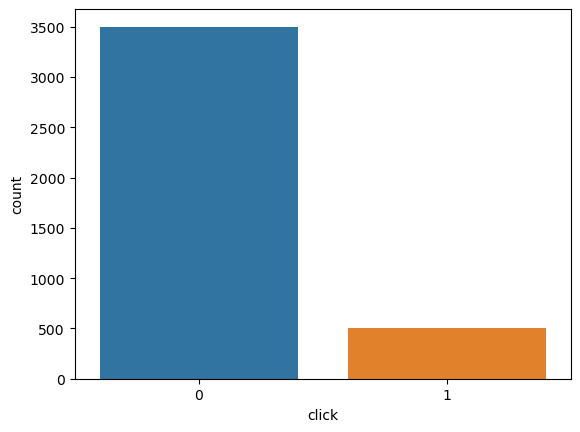

In [30]:
sns.countplot(x='click', data=df, )

<Axes: title={'center': 'Click Rate by Device Type'}, xlabel='device_type'>

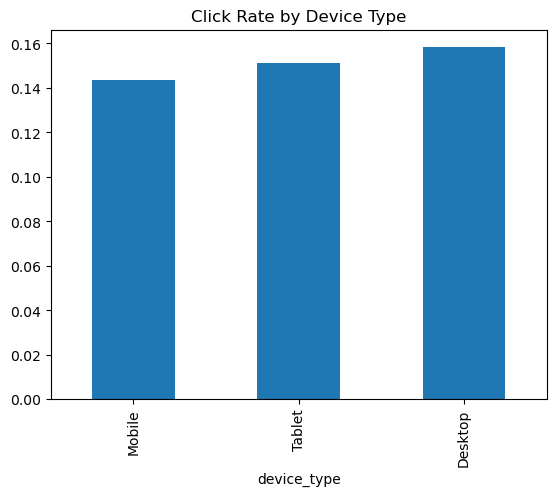

In [31]:
df.groupby('device_type')['click'].mean().sort_values().plot(kind='bar', title='Click Rate by Device Type')

<Axes: title={'center': 'Click Rate by Ad Position'}, xlabel='ad_position'>

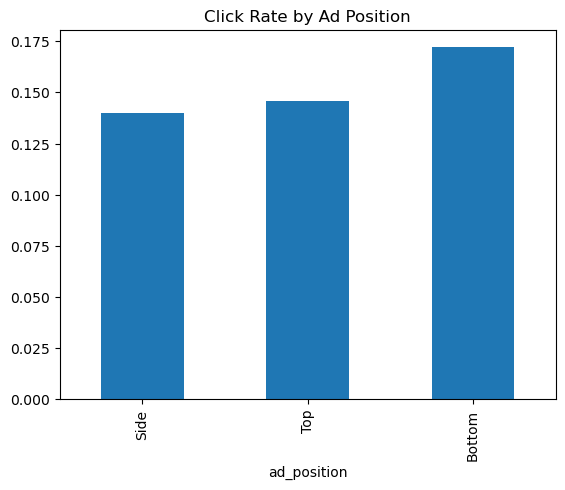

In [33]:
df.groupby('ad_position')['click'].mean().sort_values().plot(kind='bar', title='Click Rate by Ad Position')

<Axes: title={'center': 'Click Rate by Time of Day'}, xlabel='time_of_day'>

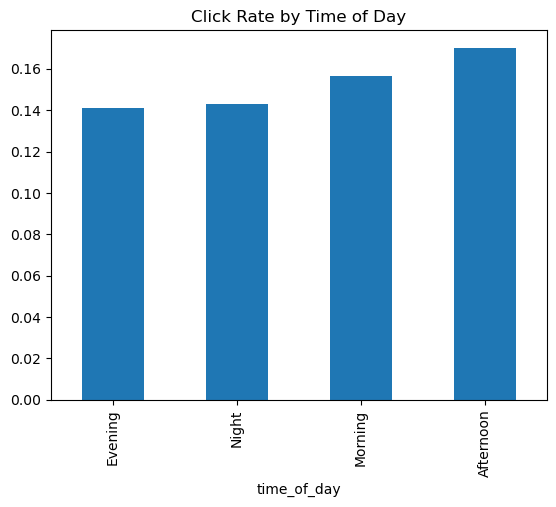

In [34]:
df.groupby('time_of_day')['click'].mean().sort_values().plot(kind='bar', title='Click Rate by Time of Day')

<Axes: title={'center': 'Click Rate by Gender'}, xlabel='gender'>

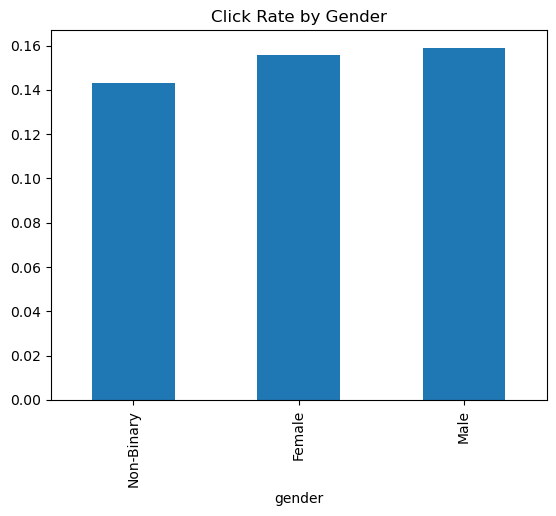

In [35]:
df.groupby('gender')['click'].mean().sort_values().plot(kind='bar', title='Click Rate by Gender')

<Axes: title={'center': 'Click Rate by Browsing History'}, xlabel='browsing_history'>

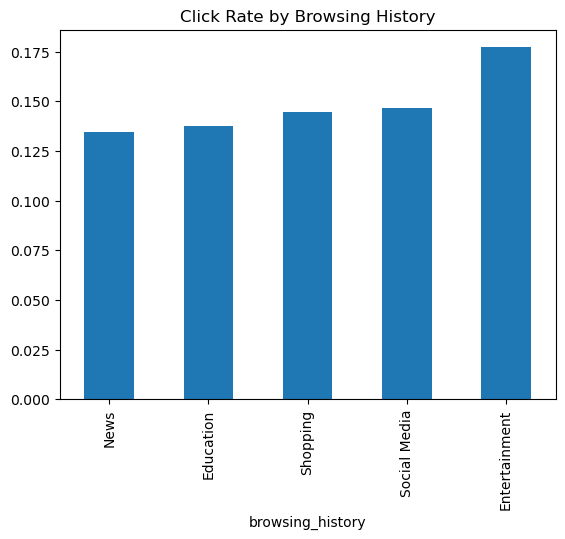

In [37]:
df.groupby('browsing_history')['click'].mean().sort_values().plot(kind='bar', title='Click Rate by Browsing History')

<Axes: xlabel='gender', ylabel='click'>

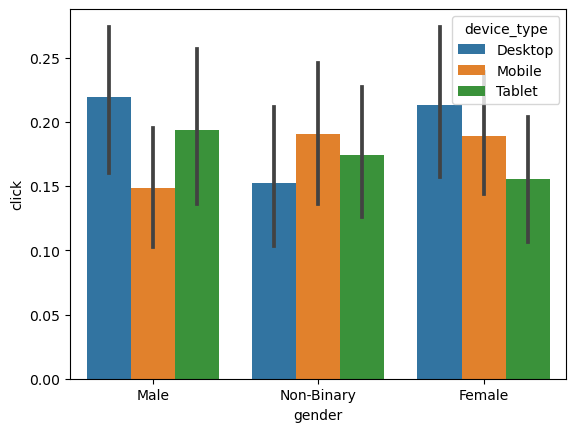

In [36]:
sns.barplot(x='gender', y='click', hue='device_type', data=df)